In [75]:
from google.colab import files
uploaded=files.upload()

Saving Financial Analytics data.csv to Financial Analytics data (2).csv


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
df=pd.read_csv("Financial Analytics data.csv")

In [77]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [78]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [80]:
df['Sales Qtr - Crore']=df['Sales Qtr - Crore'].fillna(df['Unnamed: 4'])#mergeing the last unnamed col with Sales Qtr - Crore

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [82]:
df.drop('Unnamed: 4',axis=1,inplace=True)          #delete unnamed column

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [84]:
df.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [85]:
median=float(df['Sales Qtr - Crore'].median())

In [86]:
df['SalesQtr-Crore']= df['Sales Qtr - Crore'].fillna(median) # filled the NaN values with median

In [87]:
df['MarCap-Crore']= df['Mar Cap - Crore'].fillna(float(df['Mar Cap - Crore'].median()))

In [88]:
df.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
SalesQtr-Crore        0
MarCap-Crore          0
dtype: int64

In [89]:
df.drop(['Sales Qtr - Crore','Mar Cap - Crore'],axis=1,inplace=True) #delete Sales Qtr - Crore col

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.No.           488 non-null    int64  
 1   Name            488 non-null    object 
 2   SalesQtr-Crore  488 non-null    float64
 3   MarCap-Crore    488 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [91]:
df = df.nlargest(15, 'MarCap-Crore')
fig = px.line(df, x='Name', y='MarCap-Crore', title='Market Capitalization Trends')
# Customize the axes labels
fig.update_xaxes(title_text='Company Name')
fig.update_yaxes(title_text='Market Capitalization (Crore)')
# Show the plot
fig.show()

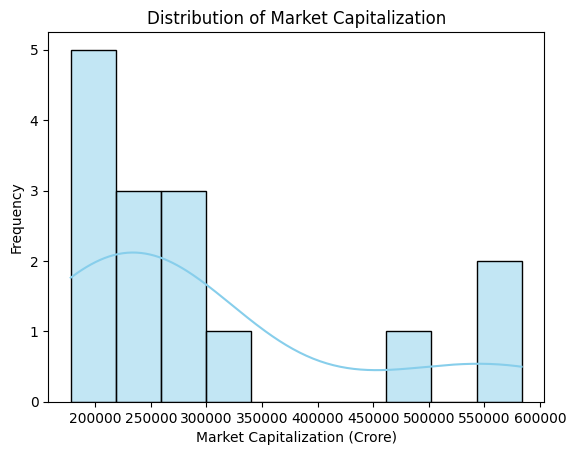

In [92]:
sns.histplot(df['MarCap-Crore'], bins=10, kde=True, color='skyblue')
# Add labels and title
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.title('Distribution of Market Capitalization')
plt.show()

In [93]:
fig = px.histogram(df.nlargest(10, 'MarCap-Crore'), x='Name', y='MarCap-Crore',
                   color='Name', color_discrete_sequence=px.colors.sequential.Greens,
                   title='Market Capitalization of Top 10 Companies')
fig.update_xaxes(title_text='Company Name')
fig.update_yaxes(title_text='Market Capitalization (Crore)')
fig.update_layout(barmode='group', width=800, height=500, plot_bgcolor='white', paper_bgcolor='lightgray')
fig.show()

In [94]:
df.describe()

,S.No.,SalesQtr-Crore,MarCap-Crore
count,15.000000,15.000000,15.000000
mean,8.000000,32313.245333,297867.957333
std,4.472136,32036.655064,135249.415184
min,1.000000,6390.710000,178017.480000
25%,4.500000,15252.930000,201528.060000
50%,8.000000,20581.270000,248320.350000
75%,11.500000,29825.725000,305241.320000
max,15.000000,110666.930000,583436.720000


In [95]:
import plotly.graph_objects as go

df_sorted = df.sort_values(by='SalesQtr-Crore', ascending=False)
top_10_sales = df_sorted['SalesQtr-Crore'].head(10).tolist()

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = go.Figure(data=[go.Pie(labels=df_sorted['Name'][:10], values=top_10_sales, hole=0.7,
                             marker=dict(colors=custom_colors))])
fig.update_layout(title_text="Top 10 Companies by Quarterly Sales")
fig.show()